# Property Manager Application

### Class diagram of the property manager application
<div>
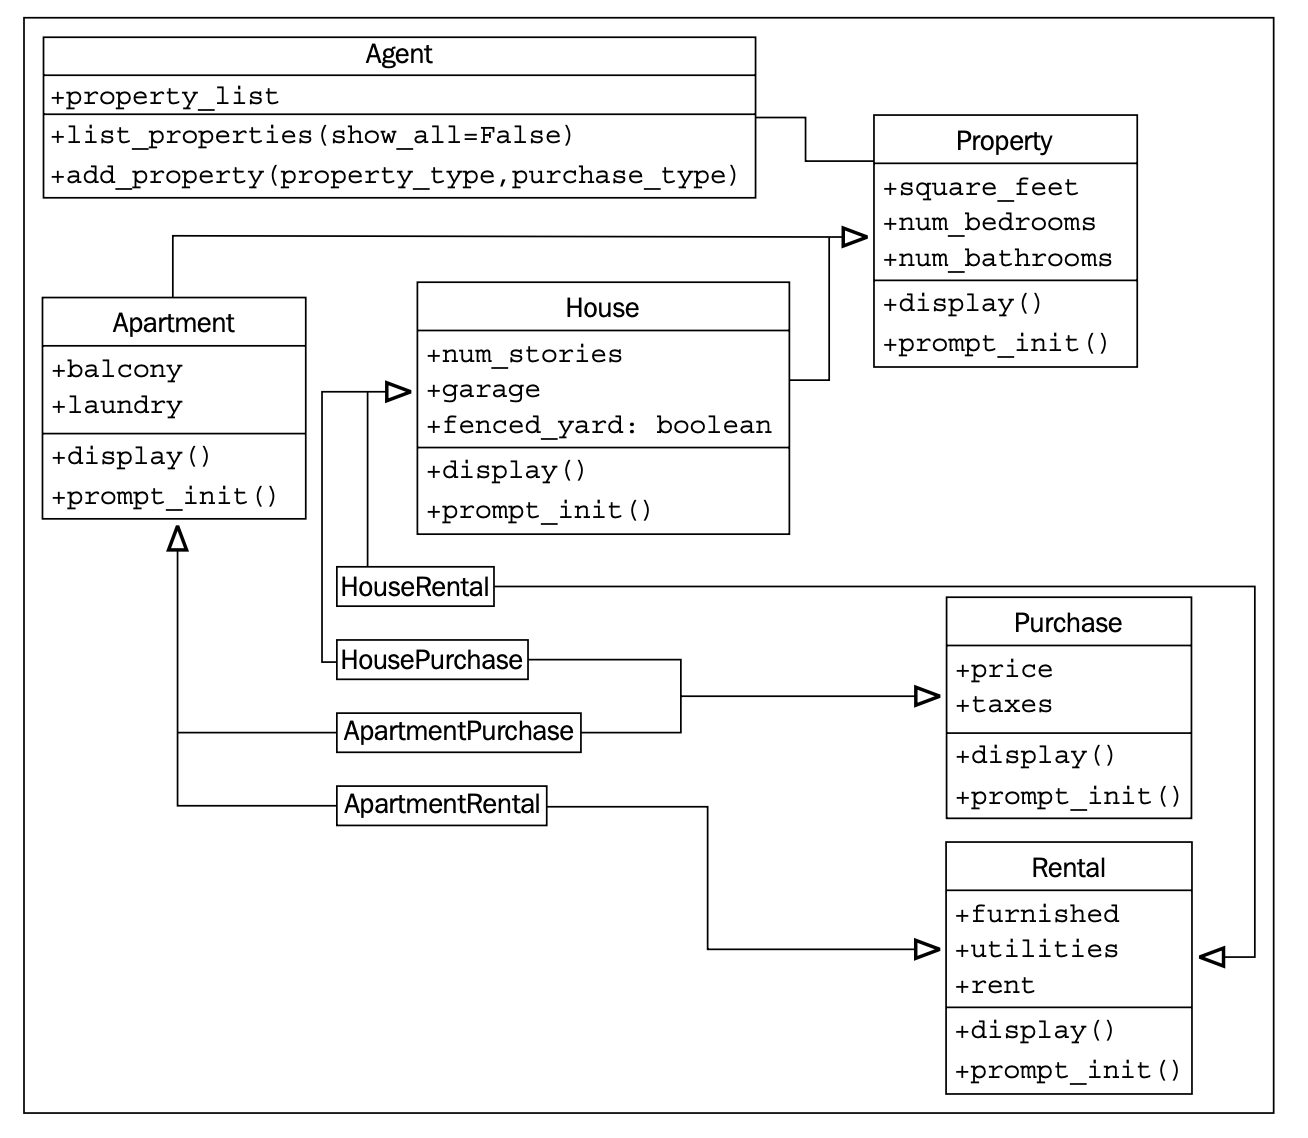
</div>

## Property class

In [40]:
class Property:
    def __init__(self, square_feet='', beds='', 
                 baths='', **kwargs):
        super().__init__(**kwargs)
        self.square_feet = square_feet
        self.num_bedrooms = beds
        self.num_baths = baths
        
    def display(self):
        print("PROPERTY DETAILS")
        print("++++++++++++++++")
        print("square footage: {}".format(self.square_feet))
        print("bedrooms: {}".format(self.num_bedrooms))
        print("bathrooms: {}".format(self.num_baths))
        print("++++++++++++++++")
        
    def prompt_init():
        return dict(square_feet=input("Enter the square feet: "),
                    beds=input("Enter the number of bedrooms: "),
                    baths=input("Enter the number of bathrooms: "))
    prompt_init = staticmethod(prompt_init)

## Apartment class

Note that **Apartment** class in inheriting from the **Property** class

In [59]:
class Apartment(Property):
    valid_laundries = ("coin", "ensuite", "none")
    valid_balconies = ("yes", "no", "solarium")
    
    def __init__(self, balcony='', laundry='', **kwargs):
        super().__init__(**kwargs)
        self.balcony = balcony
        self.laundry = laundry
        
    def display(self):
        super().display()
        print("APARTMENT DETAILS")
        print("laundry: {}".format(self.laundry))
        print("has balcony: {}".format(self.balcony))
        
    def prompt_init():
        parent_init = Property.prompt_init()
        laundry = ''
        while laundry.lower() not in \
            Appartment.valid_laundries:
            laundry = input("What laundry facilities does "
                            "the property have? ({})".format(", ".join(Apartment.valid_laundries)))
        balcony = ''
        while balcony.lower() not in \
            Appartment.valid_balconies:
            balcony = input("Does the apartment has a balcony? ({})".format(", ".join(Apartment.valid_balconies)))
        parent_init.update({
            "laundry": laundry,
            "balcony": balcony
        })
        return parent_init
    prompt_init = staticmethod(prompt_init)
        

### validation input function

In [60]:
def get_valid_input(input_string, valid_options):
    input_string += " ({}) ".format(", ".join(valid_options))
    response = input(input_string)
    while response.lower() not in valid_options:
        response = input(input_string)
    return response

In [61]:
# functionn test
get_valid_input("what laundry?", ("coin", "ensuite", "none"))

what laundry? (coin, ensuite, none) none


'none'

In [62]:
# Updating the Apartment class to use the get_valid_input function
class Apartment(Property):
    valid_laundries = ("coin", "ensuite", "none")
    valid_balconies = ("yes", "no", "solarium")
    
    def __init__(self, balcony='', laundry='', **kwargs):
        super().__init__(**kwargs)
        self.balcony = balcony
        self.laundry = laundry
        
    def display(self):
        super().display()
        print("APARTMENT DETAILS")
        print("laundry: {}".format(self.laundry))
        print("has balcony: {}".format(self.balcony))
        
    def prompt_init():
        parent_init = Property.prompt_init()
        laundry = get_valid_input("What laundry facilities does the property have? ",
                Apartment.valid_laundries)
        balcony = get_valid_input("Does the property have a balcony? ",
                Apartment.valid_balconies)
        parent_init.update({
            "laundry": laundry,
            "balcony": balcony
        })
        return parent_init
    prompt_init = staticmethod(prompt_init)

In [63]:
class House(Property):
    valid_garage = ("attached", "detached", "none")
    valid_fence = ("yes", "no")

    def __init__(self, num_stories='', garage='',
                fenced='', **kwargs):
        super().__init__(**kwargs)
        self.garage = garage
        self.fenced = fenced
        self.num_stories = num_stories
        
    def display(self):
        super().display()
        print("HOUSE DETAILS")
        print("# of stories: {}".format(self.num_stories))
        print("garage: {}".format(self.garage))
        print("fenced yard: {}".format(self.fenced))

    def prompt_init():
        parent_init = Property.prompt_init()
        fenced = get_valid_input("Is the yard fenced? ",
                                 House.valid_fence)
        garage = get_valid_input("Is there a garage? ",
                                 House.valid_garage)
        num_stories = input("How many stories? ")
    
        parent_init.update({
            "fenced": fenced,
            "garage": garage,
            "num_stories": num_stories
            })
        return parent_init
    prompt_init = staticmethod(prompt_init)

## Purchase and Rental classes

No super class but call `super().__init__` because they are going to be combined with the other classes, and we don't know what order the super calls will be made in.

In [64]:
class Purchase:
    def __init__(self, price='', taxes='', **kwargs):
        super().__init__(**kwargs)
        self.price = price
        self.taxes = taxes
        
    def display(self):
        super().display()
        print("PURCHASE DETAILS")
        print("selling price: {}".format(self.price))
        print("estimated taxes: {}".format(self.taxes))
        
    def prompt_init():
        return dict(
            price=input("What is the selling price? "),
            taxes=input("What are the estimated taxes? "))
    prompt_init = staticmethod(prompt_init)
    
class Rental:
    def __init__(self, furnished='', utilities='',
           rent='', **kwargs):
        super().__init__(**kwargs)
        self.furnished = furnished
        self.rent = rent
        self.utilities = utilities
        
    def display(self):
        super().display()
        print("RENTAL DETAILS")
        print("rent: {}".format(self.rent))
        print("estimated utilities: {}".format(
           self.utilities))
        print("furnished: {}".format(self.furnished))
    def prompt_init():
        return dict(
           rent=input("What is the monthly rent? "),
           utilities=input(
               "What are the estimated utilities? "),
           furnished = get_valid_input(
               "Is the property furnished? ",
                   ("yes", "no")))
    prompt_init = staticmethod(prompt_init)

## HouseRental class

It uses multiple inheritance to use the `propt_init()` from Rental and House super classes.

In [65]:
class HouseRental(Rental, House):
    def prompt_init():
        init = House.prompt_init()
        init.update(Rental.prompt_init())
        return init
    prompt_init = staticmethod(prompt_init)

In [49]:
# test
init = HouseRental.prompt_init()

Enter the square feet: 1
Enter the number of bedrooms: 2
Enter the number of bathrooms: 3
Is the yard fenced?  (yes, no) no
Is there a garage?  (attached, detached, none) none
How many stories? 4
What is the monthly rent? 5
What are the estimated utilities? 6
Is the property furnished?  (yes, no) no


In [50]:
house = HouseRental(**init)
house.display()

PROPERTY DETAILS
++++++++++++++++
square footage: 1
bedrooms: 2
bathrooms: 3
++++++++++++++++
HOUSE DETAILS
# of stories: 4
garage: none
fenced yard: no
RENTAL DETAILS
rent: 5
estimated utilities: 6
furnished: no


In [66]:
# Rest of combined classes

class ApartmentRental(Rental, Apartment):
    def prompt_init():
        init = Apartment.prompt_init()
        init.update(Rental.prompt_init())
        return init
    prompt_init = staticmethod(prompt_init)

class ApartmentPurchase(Purchase, Apartment):
    def prompt_init():
        init = Apartment.prompt_init()
        init.update(Purchase.prompt_init())
        return init
        prompt_init = staticmethod(prompt_init)

class HousePurchase(Purchase, House):
    def prompt_init():
        init = House.prompt_init()
        init.update(Purchase.prompt_init())
        return init
    prompt_init = staticmethod(prompt_init)

## Agent class

In [67]:
class Agent:
    def __init__(self):
        self.property_list = []

    def display_properties(self):
        for property in self.property_list:
            property.display()
            
    type_map = {
        ("house", "rental"): HouseRental,
        ("house", "purchase"): HousePurchase,
        ("apartment", "rental"): ApartmentRental,
        ("apartment", "purchase"): ApartmentPurchase
        }
    
    def add_property(self):
        property_type = get_valid_input("What type of property? ",
                   ("house", "apartment")).lower()
        payment_type = get_valid_input("What payment type? ",
                   ("purchase", "rental")).lower()
           
        PropertyClass = self.type_map[(property_type, payment_type)]
        init_args = PropertyClass.prompt_init()
        self.property_list.append(PropertyClass(**init_args))


## Testing the entire code

In [68]:
agent = Agent()
agent.add_property()

What type of property?  (house, apartment) house
What payment type?  (purchase, rental) rental
Enter the square feet: 1
Enter the number of bedrooms: 1
Enter the number of bathrooms: 1
Is the yard fenced?  (yes, no) yes
Is there a garage?  (attached, detached, none) none
How many stories? 1
What is the monthly rent? 3
What are the estimated utilities? 2
Is the property furnished?  (yes, no) yes


In [69]:
agent.add_property()

What type of property?  (house, apartment) apartment
What payment type?  (purchase, rental) purchase
Enter the square feet: 1
Enter the number of bedrooms: 2
Enter the number of bathrooms: 3
What laundry facilities does the property have?  (coin, ensuite, none) coin
Does the property have a balcony?  (yes, no, solarium) solarium
What is the selling price? 388
What are the estimated taxes? 10


In [70]:
agent.display_properties()

PROPERTY DETAILS
++++++++++++++++
square footage: 1
bedrooms: 1
bathrooms: 1
++++++++++++++++
HOUSE DETAILS
# of stories: 1
garage: none
fenced yard: yes
RENTAL DETAILS
rent: 3
estimated utilities: 2
furnished: yes
PROPERTY DETAILS
++++++++++++++++
square footage: 1
bedrooms: 2
bathrooms: 3
++++++++++++++++
APARTMENT DETAILS
laundry: coin
has balcony: solarium
PURCHASE DETAILS
selling price: 388
estimated taxes: 10
